<a href="https://colab.research.google.com/github/dishachak/Detection_Of_Autism_Spectrum_Disorder_Using_Machine_Learning/blob/main/detection_of_autism_spectrum_disorder_using_machine_learning_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries

import pandas as pd
!pip install category_encoders
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

In [ ]:
data=pd.read_csv("Toddler Autism dataset July 2018.csv")
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
#List the columns present in our dataset
data.columns.values

array(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity',
       'Jaundice', 'Family_mem_with_ASD', 'Who completed the test',
       'Class/ASD Traits '], dtype=object)

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

#x contains all columns except the last column(i.e. the target column)
#y contains only the target column
# y contains the labels


In [ ]:
#We drop the following columns as they do not help in prediction
x=x.drop(['Case_No','Qchat-10-Score'],axis=1)
x.shape

(1054, 16)

In [ ]:
# Return a Series containing counts of unique values of the specified column
x['Who completed the test'].value_counts()

family member               1018
Health Care Professional      24
Health care professional       5
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

In [ ]:
x['Who completed the test'].replace('Health care professional','Health Care Professional',inplace=True)
x['Who completed the test'].replace('Others','Other Tester',inplace=True)


In [ ]:
x['Who completed the test'].value_counts()

family member               1018
Health Care Professional      29
Self                           4
Other Tester                   3
Name: Who completed the test, dtype: int64

In [ ]:
#Performing one-hot encoding on the specified column and getting a dummy column for each unique value in the column
dummies1=pd.get_dummies(x["Who completed the test"])
dummies1

,Health Care Professional,Other Tester,Self,family member
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
1049,0,0,0,1
1050,0,0,0,1
1051,0,0,0,1
1052,0,0,0,1


In [ ]:
#We merge the columns of dummies1 dataset and original dataset and then drop the specified column from the final dataset
x=pd.concat([x,dummies1],axis=1)
x=x.drop(['Who completed the test'],axis=1)

In [ ]:
#We get the counts of each unique category in the "Ethnicity" column
x['Ethnicity'].value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: Ethnicity, dtype: int64

In [ ]:
x['Ethnicity'].replace('Others','Other race',inplace=True)
cols=["Pacifica","mixed","Native Indian"]
x["Ethnicity"].replace(cols,"Other race",inplace=True)
x["Ethnicity"].value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
Other race         54
black              53
Hispanic           40
Latino             26
Name: Ethnicity, dtype: int64

In [ ]:
#Performing one-hot encoding on "Ethnicity"column to get a dummy column for each unique value in specified column
dummies2=pd.get_dummies(x["Ethnicity"])

# We merge the columns of dummies2 dataset and original dataset and then drop the "Ethnicity" column from the final dataset
x=pd.concat([x,dummies2],axis=1)
x=x.drop(['Ethnicity'],axis=1)

In [ ]:
#x.head()
x.columns.values

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Sex', 'Jaundice', 'Family_mem_with_ASD',
       'Health Care Professional', 'Other Tester', 'Self',
       'family member', 'Hispanic', 'Latino', 'Other race',
       'White European', 'asian', 'black', 'middle eastern',
       'south asian'], dtype=object)

In [ ]:
#We label "females" as 1 and "males" as 0 using label encoder
label_encoder1=ce.OrdinalEncoder(cols=['Sex'],return_df=True,mapping=[{'col':"Sex",'mapping':{'f':1,'m':0}}])

#We fit and transform the "Sex" column by applying the label_encoder
x['Sex']=label_encoder1.fit_transform(x['Sex'])

In [ ]:
#We use label_encoder to label having jaundice as 1 and without jaundice as 0
label_encoder2=ce.OrdinalEncoder(cols=['Jaundice'],return_df=True,mapping=[{'col':"Jaundice",'mapping':{'yes':1,'no':0}}])

#We fit and transform the "Jaundice" column by applying the label_encoder
x['Jaundice']=label_encoder2.fit_transform(x['Jaundice'])

In [ ]:
label_encoder3=ce.OrdinalEncoder(cols=['Family_mem_with_ASD'],return_df=True,mapping=[{'col':"Family_mem_with_ASD",'mapping':{'yes':1,'no':0}}])
x['Family_mem_with_ASD']=label_encoder3.fit_transform(x['Family_mem_with_ASD'])

In [ ]:
#Display all the columns which are present finally in the dataset
x.columns.values

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Sex', 'Jaundice', 'Family_mem_with_ASD',
       'Health Care Professional', 'Other Tester', 'Self',
       'family member', 'Hispanic', 'Latino', 'Other race',
       'White European', 'asian', 'black', 'middle eastern',
       'south asian'], dtype=object)

In [ ]:
x.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Self,family member,Hispanic,Latino,Other race,White European,asian,black,middle eastern,south asian
0,0,0,0,0,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
1,1,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
#We create the four new columns based on the age of the toddler in months
x["Age_<=_12"]=x["Age_Mons"]<=12
x["Age_btw_12_&_24"]=(x["Age_Mons"]<=24)&(x["Age_Mons"]>12)
x["Age_btw_24_&_36"]=(x["Age_Mons"]<36)&(x["Age_Mons"]>24)
x["Age_>=_36"]=x["Age_Mons"]>=36

In [ ]:
#We drop the two specified columns
x=x.drop(["Age_Mons","Age_<=_12"],axis=1)
x[["Age_btw_12_&_24","Age_btw_24_&_36","Age_>=_36"]]=x[["Age_btw_12_&_24","Age_btw_24_&_36","Age_>=_36"]].astype("int")
x.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Latino,Other race,White European,asian,black,middle eastern,south asian,Age_btw_12_&_24,Age_btw_24_&_36,Age_>=_36
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,1,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
#We will perform model training
#We had separated the features (stored in x) and target column (stored in y)
#We split them into training data and testing data
#by using which we will select the model which is performing best on the validation data.

x_train1,x_test1,y_train1,y_test1 =  train_test_split(x,y,train_size=0.75,random_state=2134,stratify=y)

In [ ]:
print(f'Length of Training sample {len(x_train1)}')
print(f'Length of Test sample {len(x_test1)}')

#We get the class-wise count (i.e. we get the number of samples for each label )
y_train1.value_counts()

Length of Training sample 790
Length of Test sample 264


Yes    546
No     244
Name: Class/ASD Traits , dtype: int64

Our dataset is  imbalanced as the count for "Yes" is much higher, hence we need to oversample the minority class (No) in order to have a balanced dataset.

In [ ]:
#Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique to
#increase the number of cases in your dataset in a balanced way
# SMOTE works by generating new instances from the existing minority class which is supplied as input

#Oversample the training data using SMOTE

from imblearn.over_sampling import SMOTE
oversample= SMOTE()
x_train1,y_train1= oversample.fit_resample(x_train1,y_train1)
y_train1.value_counts()

Yes    546
No     546
Name: Class/ASD Traits , dtype: int64

In [ ]:
#Defining the function for model prediction on test data
def model_building(x_train,y_train,x_test,model):
    model=model.fit(x_train,y_train)
    y_prdt=model.predict(x_test)
    return y_prdt

In [ ]:
# Defining the function to generate Confusion Matrix

def Confusion_Matrix(cm,cmap,x1):
    ax=sns.heatmap(cm,annot=True,cmap=cmap)
    ax.set_title(x1)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

Now we will train some of the machine learning models and compare them which fit better with our data and gives higher accuracy in predictions.

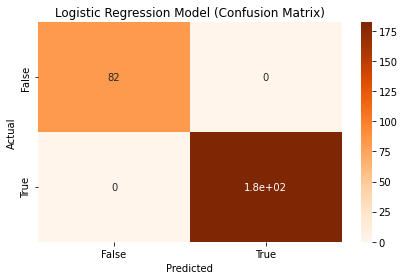

In [ ]:
# 1. Classification using Logistic Regression Model

lr=LogisticRegression(max_iter=200)
lr_predict=model_building(x_train1,y_train1,x_test1,lr)
lr_prdts=lr_predict
lr_cm=confusion_matrix(y_test1,lr_prdts)
x1="Logistic Regression Model (Confusion Matrix)"
Confusion_Matrix(lr_cm,"Oranges",x1)
plt.tight_layout()
plt.show()

In [ ]:
#Generate the classification report for Logistic Regression model

print(25*" "+5*"*"+"LOGISTIC REGRESSION"+5*"*")
print()
print(classification_report(y_test1, lr_prdts))

                         *****LOGISTIC REGRESSION*****

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        82
         Yes       1.00      1.00      1.00       182

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



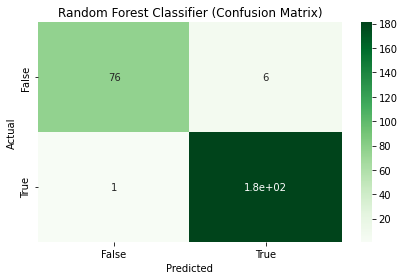

In [ ]:
# 2. Classification using RandomForestClassifier (ensemble classifier)
rf=RandomForestClassifier()
rf_predict=model_building(x_train1,y_train1,x_test1,rf)
rf_prdts=rf_predict
rf_cm=confusion_matrix(y_test1,rf_prdts)
x1="Random Forest Classifier (Confusion Matrix)"
Confusion_Matrix(rf_cm,"Greens",x1)
plt.tight_layout()
plt.show()

In [ ]:
#Generate the classification report for RandomForest Classifier (collection of Decision Trees)

print(25*" "+5*"*"+"RANDOM FOREST CLASSIFIER"+5*"*")
print()
print(classification_report(y_test1, rf_prdts))

                         *****RANDOM FOREST CLASSIFIER*****

              precision    recall  f1-score   support

          No       0.99      0.93      0.96        82
         Yes       0.97      0.99      0.98       182

    accuracy                           0.97       264
   macro avg       0.98      0.96      0.97       264
weighted avg       0.97      0.97      0.97       264



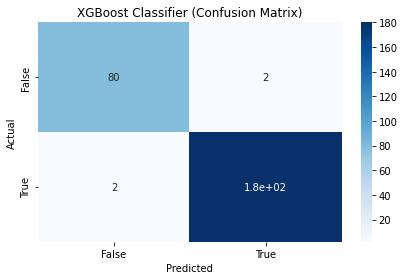

In [ ]:
# 3. Classification using XGBoost Classifier

xg=XGBClassifier()
xg_predict=model_building(x_train1,y_train1,x_test1,xg)
xg_prdts=xg_predict
xg_cm=confusion_matrix(y_test1,xg_prdts)
x1="XGBoost Classifier (Confusion Matrix)"
Confusion_Matrix(xg_cm,"Blues",x1)
plt.tight_layout()
plt.show()

In [ ]:
#Generate classification report for XGBoost Classifier

print(25*" "+5*"*"+"XGBoost CLASSIFIER"+5*"*")
print()
print(classification_report(y_test1, xg_prdts))


                         *****XGBoost CLASSIFIER*****

              precision    recall  f1-score   support

          No       0.98      0.98      0.98        82
         Yes       0.99      0.99      0.99       182

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



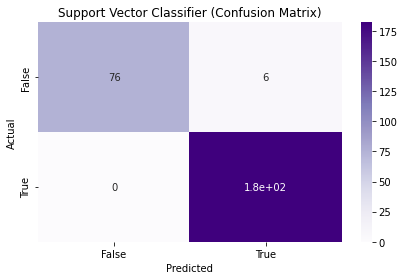

In [ ]:
# 4. Classification using Support Vector Classifier
sv=SVC()
sv_predict=model_building(x_train1,y_train1,x_test1,sv)
sv_prdts=sv_predict
sv_cm=confusion_matrix(y_test1,sv_prdts)
x1="Support Vector Classifier (Confusion Matrix)"
Confusion_Matrix(sv_cm,"Purples",x1)
plt.tight_layout()
plt.show()

In [ ]:
#Generate classification report for support vector classifier

print(25*" "+5*"*"+"SUPPORT VECTOR CLASSIFIER"+5*"*")
print()
print(classification_report(y_test1, sv_prdts))


                         *****SUPPORT VECTOR CLASSIFIER*****

              precision    recall  f1-score   support

          No       1.00      0.93      0.96        82
         Yes       0.97      1.00      0.98       182

    accuracy                           0.98       264
   macro avg       0.98      0.96      0.97       264
weighted avg       0.98      0.98      0.98       264



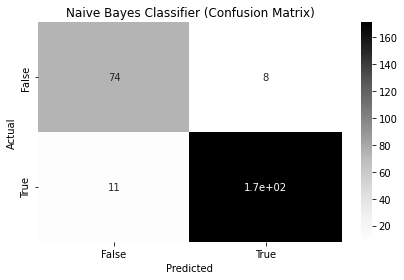

In [ ]:
#5. Classification using Naive Bayes Classifier
gnb = GaussianNB()
gnb_predict=model_building(x_train1,y_train1,x_test1,gnb)
gnb_prdts=gnb_predict
gnb_cm=confusion_matrix(y_test1,gnb_prdts)
x1="Naive Bayes Classifier (Confusion Matrix)"
Confusion_Matrix(gnb_cm,"Greys",x1)
plt.tight_layout()
plt.show()

In [ ]:
#Generating classification report for Naive Bayes Classifier

print(25*" "+5*"*"+"NAIVE BAYES CLASSIFIER"+5*"*")
print()
print(classification_report(y_test1, gnb_prdts))


                         *****NAIVE BAYES CLASSIFIER*****

              precision    recall  f1-score   support

          No       0.87      0.90      0.89        82
         Yes       0.96      0.94      0.95       182

    accuracy                           0.93       264
   macro avg       0.91      0.92      0.92       264
weighted avg       0.93      0.93      0.93       264



In [ ]:
lr=lr.fit(x_train1,y_train1)
y_x=lr.predict_proba(x_test1)
y_out=pd.DataFrame(y_x,columns=['Yes Autism','No Autism'])
y_out.head()

,Yes Autism,No Autism
0,0.000174,0.999826
1,0.838212,0.161788
2,0.984480,0.015520
3,0.020618,0.979382
4,0.000015,0.999985


In [ ]:
# Create a pickle file to save the model
with open('Mymodel.pickle','wb') as output_file:
  pickle.dump(lr,output_file)